In [40]:
from __future__ import unicode_literals
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
import SimpleITK as sitk
import tensorflow as tf
import os
import numpy as np
from dltk.io.augmentation import flip
from dltk.io.preprocessing import whitening
from dltk.io.preprocessing import resize_image_with_crop_or_pad
# from dltk.io.augmentation import extract_class_balanced_example_array
from patch import extract_class_balanced_example_array
from matplotlib import pyplot as plt
import nibabel as nib
import h5py
from scipy import ndimage
from sklearn.preprocessing import normalize

In [26]:
# Column 3: Probabilities Mask
probs_mask_fn   = str('./prob_ori/norm/__10230_8_niftynet_out.nii.gz')
probs_mask      = sitk.GetArrayFromImage(sitk.ReadImage(probs_mask_fn, sitk.sitkFloat32))
probs_mask      = np.flip(probs_mask,axis=1)
probs_mask      = np.expand_dims(probs_mask,axis=3)

# Column 4: Feature Maps
feature_maps_fn = str('./prob_ori/norm/window_seg_10230_8__niftynet_out.nii.gz')
# Loading 5D NIFTI Images as 4D Image
file_reader = sitk.ImageFileReader()
file_reader = sitk.ImageFileReader()
file_reader.SetFileName(feature_maps_fn)
file_reader.ReadImageInformation()
feature_maps_size = list(file_reader.GetSize())
file_reader.SetExtractSize([0 if v == 1 else v for v in feature_maps_size])
feature_maps = file_reader.Execute()
feature_maps = sitk.Compose( [sitk.Extract(feature_maps, feature_maps.GetSize()[:3]+(0,), [0,0,0, i]) for i in range(feature_maps_size[-1])] )
feature_maps = sitk.GetArrayFromImage(feature_maps)

print('Probabilities Mask Shape: {}'.format(probs_mask.shape))
print('Feature Maps Shape: {}'.format(feature_maps.shape))

Probabilities Mask Shape: (303, 208, 208, 1)
Feature Maps Shape: (303, 208, 208, 61)


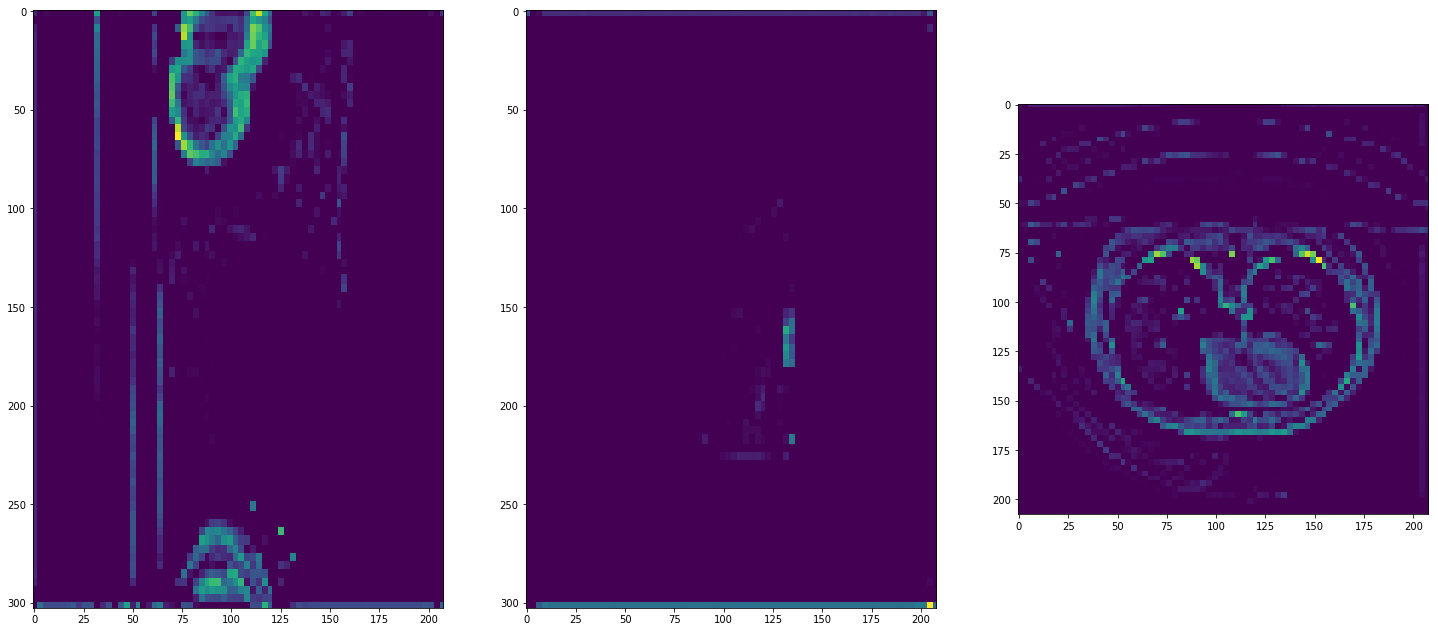

In [93]:
plt.figure(figsize=[25,18])

feature_map_comp = 1
slice            = 200

# Axial Example
plt.subplot(131)
plt.imshow(feature_maps[:,:,slice,feature_map_comp])
plt.subplot(132)
plt.imshow(feature_maps[:,slice,:,feature_map_comp])
plt.subplot(133)
plt.imshow(feature_maps[slice,:,:,feature_map_comp])

plt.show()

In [94]:
feature_maps = feature_maps/feature_maps.max()
bottle       = np.concatenate((feature_maps,probs_mask), axis=3)
bottle       = np.mean(bottle, axis=3)
#bottle       = bottle/bottle.max()

print('Bottled Feature Maps Shape: {}'.format(bottle.shape))

Bottled Feature Maps Shape: (303, 208, 208)


In [79]:
bottle1       = np.sum(feature_maps, axis=3)
bottle1       = bottle1/bottle1.max()

print('Bottled Feature Maps Shape: {}'.format(bottle1.shape))

Bottled Feature Maps Shape: (303, 208, 208)


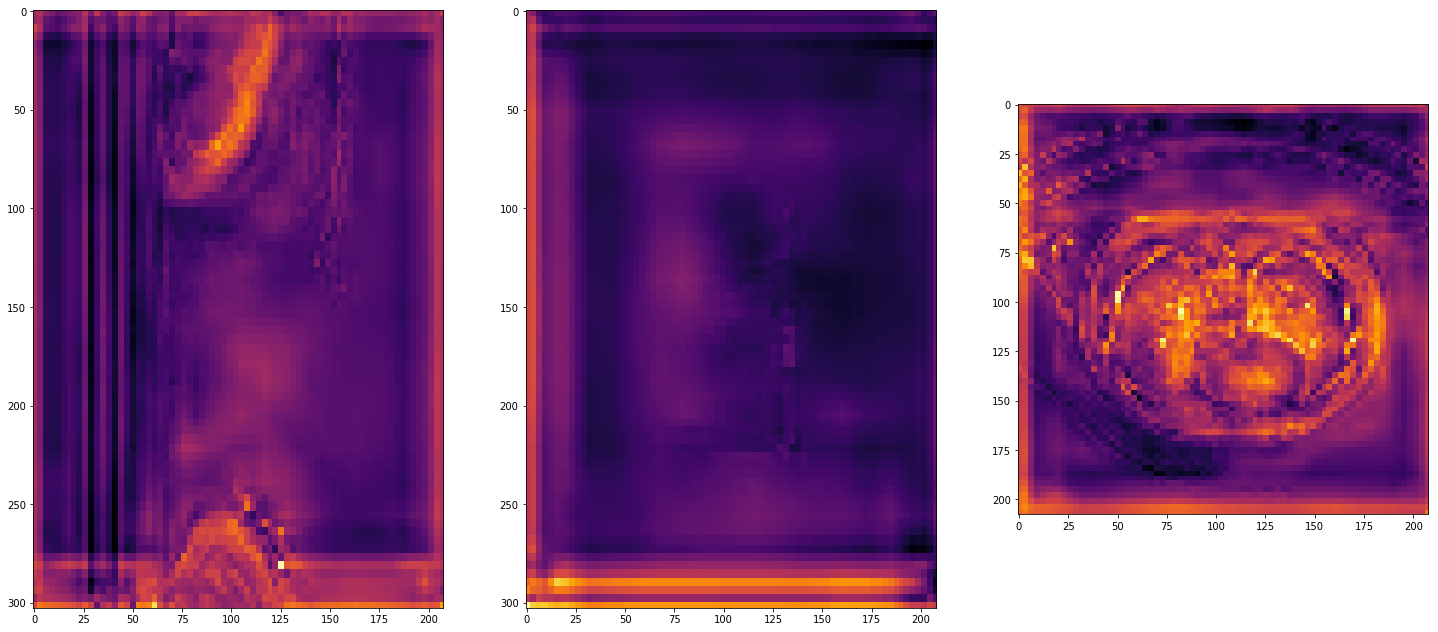

In [91]:
plt.figure(figsize=[25,18])

slice            = 200

plt.subplot(131)
plt.imshow(bottle1[:,:,slice],cmap='inferno')
plt.subplot(132)
plt.imshow(bottle1[:,slice,:],cmap='inferno')
plt.subplot(133)
plt.imshow(bottle1[slice,:,:],cmap='inferno')

plt.show()

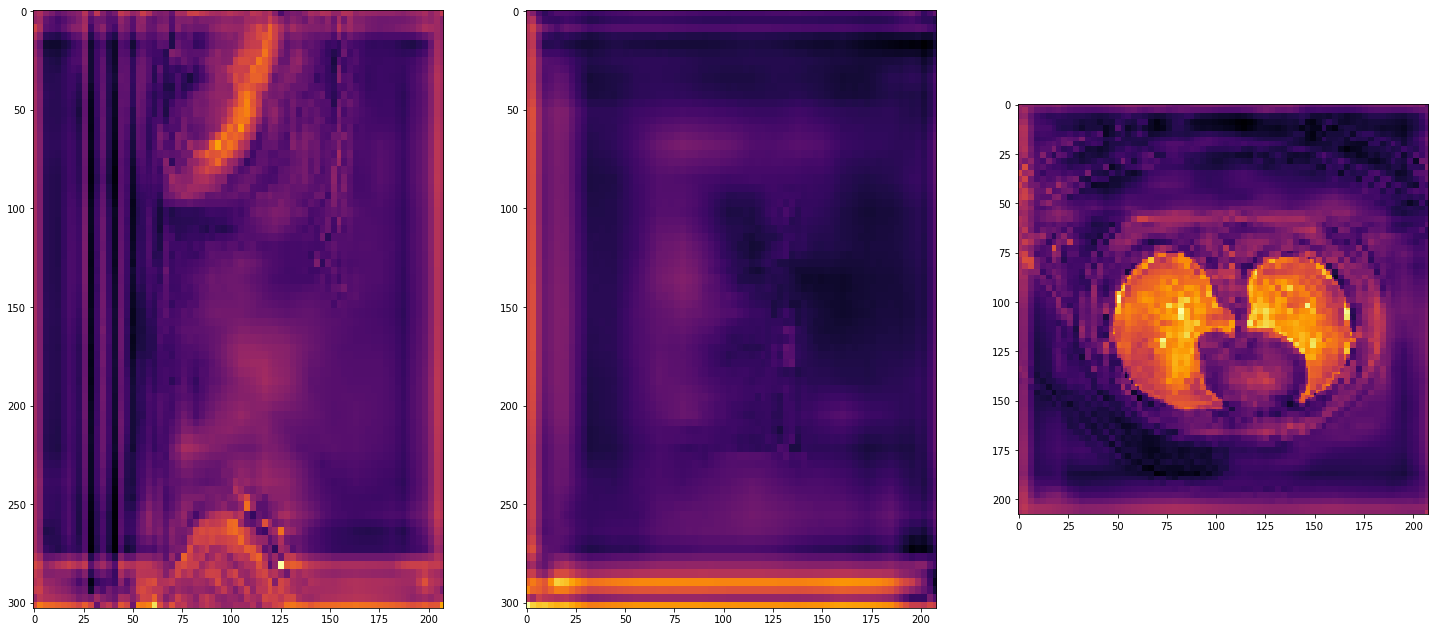

In [95]:
plt.figure(figsize=[25,18])

plt.subplot(131)
plt.imshow(bottle[:,:,slice],cmap='inferno')
plt.subplot(132)
plt.imshow(bottle[:,slice,:],cmap='inferno')
plt.subplot(133)
plt.imshow(bottle[slice,:,:],cmap='inferno')

plt.show()

In [99]:
img_fn     = 'window_seg_195_3__niftynet_out.nii.gz'
subject_id = 'CT' + str(img_fn.split('seg')[-1].split('__niftynet')[0])
subject_id = str(subject_id)
img0_fn     = '/DataFolder/lungs/segmentation/densevnet/probs_masks/Normal/__' + str(subject_id.split('CT_')[-1]) + '_niftynet_out.nii.gz'
img0_fn

'/DataFolder/lungs/segmentation/densevnet/probs_masks/Normal/__195_3_niftynet_out.nii.gz'

In [103]:
hf = h5py.File('fm_normal.h5', 'r')
hf.keys()
meow = hf.get('CT_10230_8')
meow.shape

(303, 208, 208)

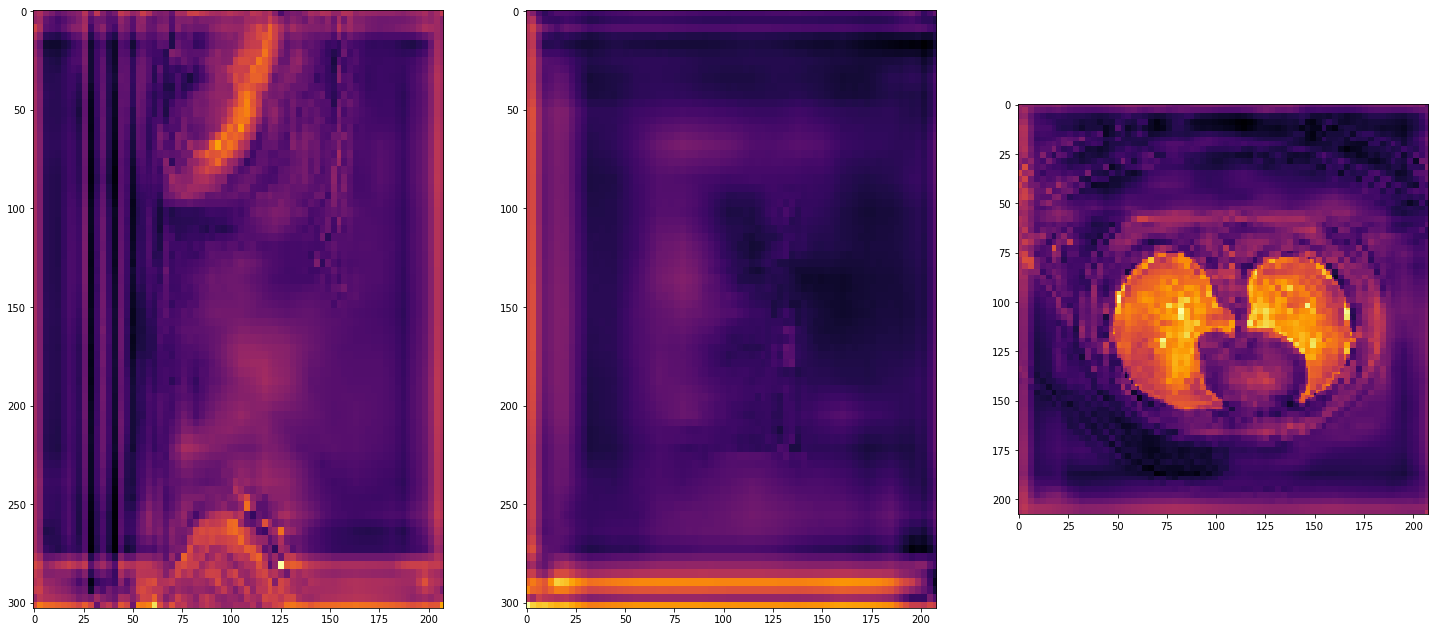

In [104]:
plt.figure(figsize=[25,18])

plt.subplot(131)
plt.imshow(meow[:,:,slice],cmap='inferno')
plt.subplot(132)
plt.imshow(meow[:,slice,:],cmap='inferno')
plt.subplot(133)
plt.imshow(meow[slice,:,:],cmap='inferno')

plt.show()